## AST4310, Autumn 2021, Project 2

Authored by (candidate number): **15508**.

#### Header and imports

In [1]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt

### units/constants, and BlackBody for line profile
from astropy import units
from astropy import constants
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
quantity_support()

### for voigt function
from scipy.special import wofz

### nice looking plots
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
plt.rc('figure', figsize=(10, 10 / 1.3))
plt.rc('font', size=16)

### custom colormaps/cyclers for plots
from matplotlib import cm
from cycler import cycler

### Exercise 1: The Planck Law and radiation through an isothermal layer


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Plot the Planck function $B_\lambda$ for 100 $< \lambda <$ 2000 nm for a range of temperatures (5000 to 8000 K). Use a log scale for both the x and y axes. Explain the slopes of the righthand part.

* Use equation (5) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:


``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```

* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$? (Hint: use a log scale in the x and y axes to study the behavior at small $\tau$.)  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
 
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?
    

</div>

We implement the Planck function $B_\lambda$ as given by:

\begin{align*}
    B_\lambda(T) = \frac{2hc^2}{\lambda^5} \frac{1}{\mathrm{e}^{hc/\lambda kT}-1} \label{eq:planck} \tag{1}
\end{align*}

Where $h$ is the Planck constant, $c$ is the speed of light, $k$ is the Boltzmann constant, $\lambda$ is the wavelength, and $T$ is the temperature.

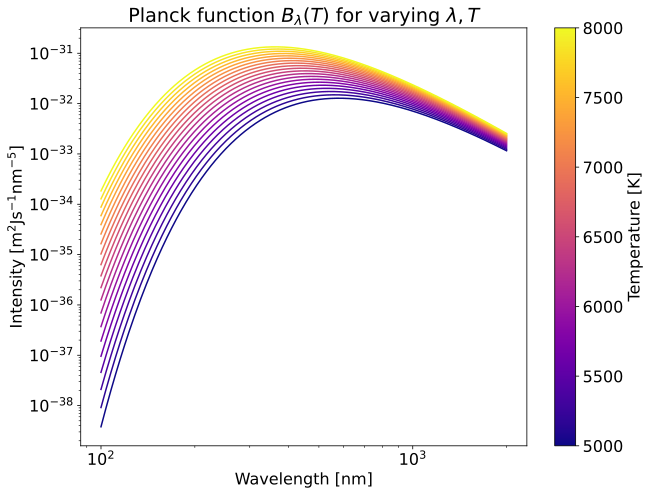

In [2]:
def B_lam(T, lam):
    """
    The Planck function for a given temperature T and wavelength lam
    """
    h = constants.h   #Planck constant
    c = constants.c   #Speed of light
    k = constants.k_B #Boltzmann constant
    return 2*h*c**2 / lam**5 * 1/(numpy.exp(h*c/(lam*k*T)) - 1)

T = numpy.linspace(5000, 8000, 20) * units.K     #Defining range of temperatures
lam = numpy.linspace(100, 2000, 1000) * units.nm #Interval of wavelengths to calculate Plancks function for

### plotting
fig, ax = plt.subplots()
norm = matplotlib.colors.Normalize(vmin=T.min().value, vmax=T.max().value, clip=False)     #matplotlib normalized temperature range for colorbar
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.plasma), ax=ax, label="Temperature [K]") #custom colorbar
colors = cm.plasma(numpy.linspace(0, 1, len(T)))                                           #splitting colormap into len(T) colors (for lines)
for i, T_i in enumerate(T):
    ax.plot(lam, B_lam(T_i, lam), color=colors[i])
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("Intensity [m$^2$Js$^{-1}$nm$^{-5}$]")
ax.set_xlabel("Wavelength [nm]")
ax.set_title(r"Planck function $B_\lambda(T)$ for varying $\lambda, T$");

The right hand part of the slopes are where the $1/\lambda^5$ term outgrows the exponential. As the wavelength increases, this term grows large enough where constants such as temperature become less influental, seen as the grouping of curves in the plot. As opposed to the left hand side, where the exponential term is dominating, and temperature has a larger effect. A physical interpretation of this effect is that there will always be some amount of low energy (large wavelength) radiation in a continuum, which after reaching a minimum would then be less affected by temperature.

We implement equation (5) describing intensity of radiation through an isothermal layer, given as:

\begin{align*}
    I_\lambda = I_\lambda(0) \mathrm{e}^{-\tau} + B_\lambda \, \left( 1 - \mathrm{e}^{-\tau} \right). \label{eq:transfer} \tag{5}
\end{align*}

Where $I_\lambda (0)$ is the initial intensity before encountering the layer, $\tau$ is the optical depth of the layer, and $B_\lambda$ is Plancks function for the layer.

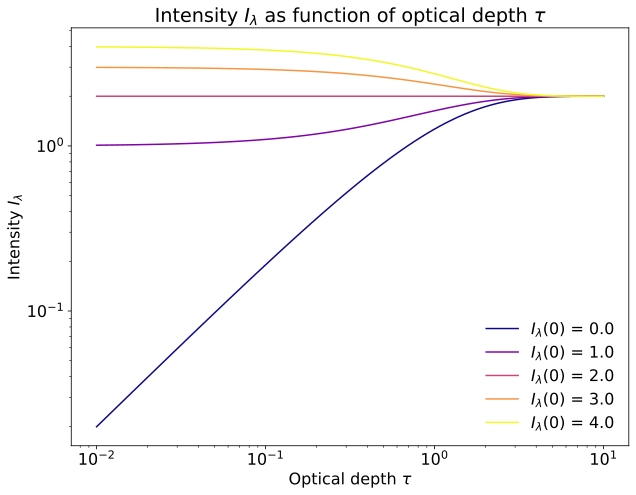

In [3]:
def I(tau, I0, B_lam):
    """
    Calculates radiation through an isotermal layer
    """
    return I0*numpy.exp(-tau) + B_lam*(1-numpy.exp(-tau))

tau = numpy.logspace(-2, 1, 100) #optical depth
i0 = numpy.arange(5)             #initial intensity
b_lambda = 2                     #layer source function constant for depth

colors = cm.plasma(numpy.linspace(0, 1, len(i0)))
for i, i0_i in enumerate(i0):
    plt.plot(tau, I(tau, i0_i, b_lambda), color=colors[i], label=r"$I_\lambda (0)$ = {:.1f}".format(i0_i))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title(r"Intensity $I_\lambda$ as function of optical depth $\tau$")
plt.xlabel(r"Optical depth $\tau$")
plt.ylabel(r"Intensity $I_\lambda$");

For $\tau << 1$ and $I_\lambda(0)=0$, we can see it increases exponentially (linearly on log scale) for increasing optical depth. This is reflected in equation (5), where we see $I_\lambda(0)=0$ gives $I_\lambda = B_\lambda(1-e^{-\tau})$. On the other end, large initial values $I_\lambda (0) > B_\lambda$ are not affected much and remain nearly constant in the interval $\tau\in[10^{-2}, 10^{-1}]$. This can also be seen in equation (5) where $\tau\approx 0$ results in $I_\lambda = I_\lambda(0)$.

"Optically thin" layers are layers where the incoming radiation is not very affected by the layer, which corresponds to $\tau << 1$ and can be demonstrated for $I_\lambda (0) > B_\lambda$. Though it could make sense to name areas with $\tau << 1$ "radiatively thin", as the small contribution made to the radiation could still make a difference for cases with small/no initial intensity. Such areas do more than only absorb/block the incoming radiation radiation, and "optically thin" could be misinterpreted.

"Optically thick" means the initial intensity is severely/completely absorbed by the layer, which is the case for $\tau >> 1$. As the optical depth becomes large enough, no amount of light is able to pass through. It is equivalent to a solid wall, which does not let any light pass. The emergent intensity for $\tau >> 1$ is largely/only due to the inherent emission of the layer itself, coming from the surface and shallow layers of the absorbing material.

### Exercise 2: Spectral lines from a solar reversing layer

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model for a reference wavelength of 500 nm, writing code for this purpose. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

* Study line profiles with different $\tau_0$, using `tau0 = 10 ** numpy.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin and optically thick, at line center? And at $u=5$?

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center, $I_{u=0}$? Check these values by computing them directly. What happens to these values at other wavelengths?  

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

</div>

We implement the Schuster-Schwarzschild model for line models, given by:

\begin{align*}
    I_\lambda = B_\lambda(T_{\rm surface}) \mathrm{e}^{-\tau_\lambda} + B_\lambda(T_{\rm layer}) \left( 1 - \mathrm{e}^{-\tau_\lambda} \right) \label{eq:SS transfer} \tag{7}
\end{align*}

Where $\tau_\lambda(u) = \tau(0) V(a, u)$ is the broadened optical depth from the Voigt profile.

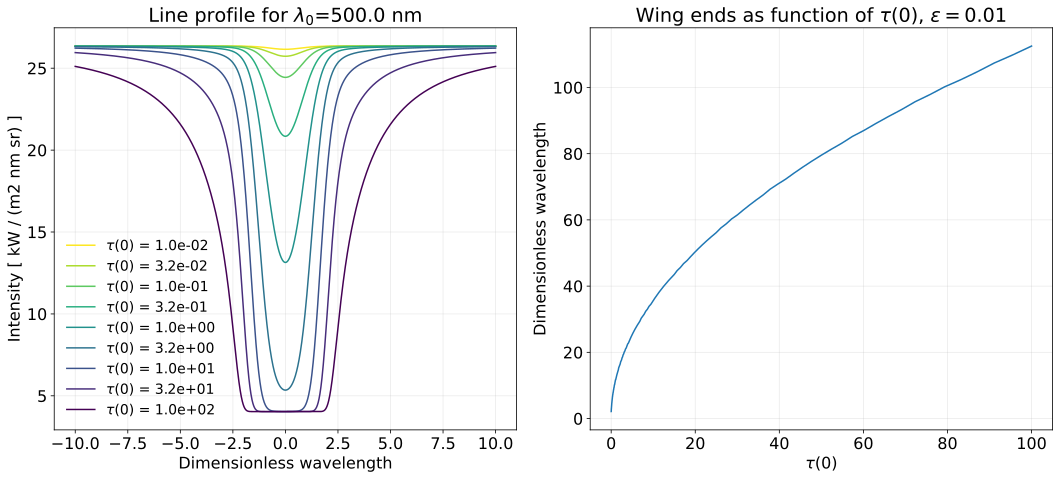

In [4]:
def voigt(damping, u):
    """
    Calculates the Voigt function.
    """
    z = (u + 1j * damping)
    return wofz(z).real

### function from group session
i_units = units.Quantity(1, unit="kW m-2 sr-1 nm-1")
def compute_profile(tau0, a, u, wavelength, temp_surface, temp_layer):
    """
    Computes line profile using Schuster-Schwarzschild model
    """
    ### axis manipulation
    wave = wavelength[numpy.newaxis, numpy.newaxis]
    tau = tau0[numpy.newaxis] * voigt(a, u[:, numpy.newaxis])
    tau = tau[..., numpy.newaxis]
    
    ### Schuster-Schwarzschild model
    result = (BlackBody(temp_surface, scale=i_units)(wave) * numpy.exp(-tau) +
              BlackBody(temp_layer, scale=i_units)(wave) * (1 - numpy.exp(-tau)))
    return numpy.squeeze(result)

### parameters
lam0 = 500 * units.nm             #central wavelength
u = numpy.linspace(-10, 10, 2001) #Δλ, measured in doppler widths (u = dimensionless)
tau0 = numpy.logspace(-2, 2, 9)   #optical depth normalized for wavelength
T_surface = 5777 * units.K        #surface temperature
T_layer   = 4200 * units.K        #layer temperature
a = 0.1                           #damping parameter

### computing intensity
intensity = compute_profile(tau0, a, u, lam0, T_surface, T_layer)

### plotting line profile
colors = cm.viridis(numpy.linspace(0, 1, len(tau0)))[::-1] #custom colors
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for i in range(len(tau0)):
    ax[0].plot(u, intensity[:, i], color=colors[i], label=r'$\tau(0)$ = {:.1e}'.format(tau0[i]))
ax[0].legend(prop={'size': 14})
ax[0].set_xlabel("Dimensionless wavelength")
ax[0].set_ylabel(r"Intensity [ {} ]".format(intensity.unit))
ax[0].set_title(r"Line profile for $\lambda_0$={:.1f}".format(lam0));
ax[0].grid(alpha=0.25)

### finding wing ends
tau0 = numpy.logspace(-2, 2, 200)              #more points for smoother plot
u = numpy.linspace(-300, 300, 2001)            #wider u to get ends of large tau0 values
intensity = compute_profile(tau0, a, u, lam0, T_surface, T_layer)
intensity = -intensity + intensity[:, 0].max() #removing approx continuity
eps = 0.01                                     #condition for where wings are considered ended, within epsilon
end = []
for i in range(len(tau0)):
    end.append(abs(u[intensity[:, i].value<eps]).min())
ax[1].plot(tau0, end)
ax[1].set_title(r"Wing ends as function of $\tau(0)$, $\epsilon = ${}".format(eps))
ax[1].set_xlabel(r"$\tau(0)$")
ax[1].set_ylabel("Dimensionless wavelength")
ax[1].grid(alpha=0.25)
plt.tight_layout()

To a get flat bottom profile we need the layer temperature to be smaller than the surface temperature T$_\text{layer}$ < T$_\text{surface}$ to an absorption line (as opposed to an emission line), and the damping factor $a$ to be small compared to $\tau(0)$. The reasioning for the temperature is that the emission of the layer needs to be less than the source, else the line will get an added intensity instead of absorption. By playing around with the model, we see the damping factor $a$ causes the line profile to widen, increasing the wings prominence while lessening the absorption in the centre line. Thus we want this damping factor to be small such that the absorption is concentrated around $\lambda_0$ and allowing the line profile to hit the lower saturation limit.

Profile shapes for $\tau(0) << 1$ are only lightly affected, since the medium would be considered optically thin and not absorbed in any large amount. The saturation limit seen for $\tau(0) >> 1$ is due to the emission of the layer itself, with $\tau_\lambda \rightarrow \infty \Rightarrow e^{-\tau_\lambda} \rightarrow 0$ causing the profile to become $I_\lambda \approx B_\lambda(T_\text{layer})$.

Line wings only develop for large $\tau(0)$ since they are dependant on the broadened optical depth, defined as $\tau_\lambda(u) = \tau(0)V(a, u)$. The Voigt function is smaller further from the line centre, meaning an even larger $\tau(0)$ is needed for them to be visible (note the exponential growth of $\tau(0)$ in the plot). We will later see that line profile indeed grows linearly with $\tau(0)$ (before saturation) when plotting the curve area as function of $\tau(0)$. Plotting where the line wings come within a small $\epsilon$ to the continuum, effectivly the end of the wings, we can see that the curve goes as $\sqrt{\tau(0)}$ times a constant $C\approx 10$. This will become relevant later as we find the curve area grows as $\sqrt{\tau(0)}$ (slope 1:2 in log-log plot) after line core saturation.

We define optically thick as where a photon can not pass through without being absorbed. Generally this is the case for $\tau(0) >> 1$, and this seems to be reflected in the plot as lines for $\tau(0)=[10, ~32, 100]$ are all fully saturated at line centre. The line with $\tau(0)\approx 3.2$ could also be considered optically thick as it is nearly fully absorbed at line centre, while all others still keep a large amount of their intensity. At $u=5$ all plotted values of $\tau(0)$ are optically thin, as only a fraction is absorbed at most.

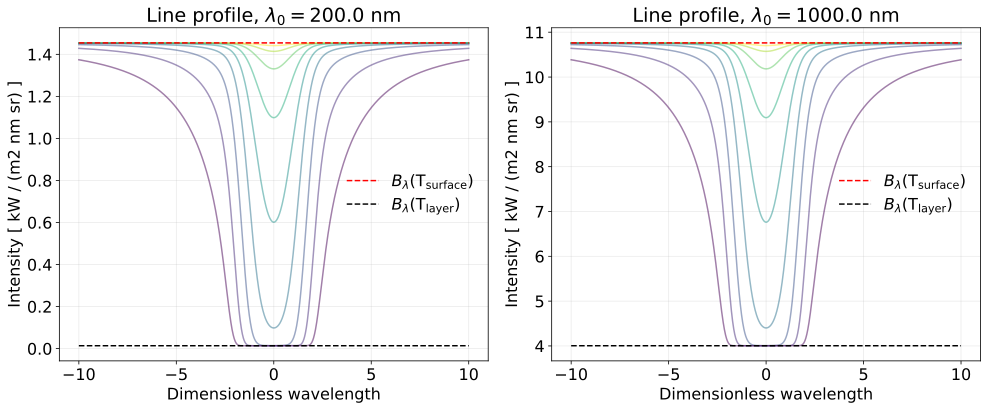

In [5]:
tau0 = numpy.logspace(-2, 2, 9)
u = numpy.linspace(-10, 10, 2001)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for j, lam0 in enumerate([200*units.nm, 1000*units.nm]): #loop for each wavelength to avoid writing same thing twice
    intensity = compute_profile(tau0, a, u, lam0, T_surface, T_layer)
    for i in range(len(tau0)):
        ax[j].plot(u, intensity[:, i], color=colors[i], alpha=0.5)
    ax[j].plot(u, BlackBody(T_surface, scale=i_units)(lam0)*numpy.ones(len(u)), "--r", label=r"$B_\lambda$(T$_{\rm surface}$)") #blackbody radiation at surface to compare with continuum
    ax[j].plot(u, BlackBody(  T_layer, scale=i_units)(lam0)*numpy.ones(len(u)), "--k", label=r"$B_\lambda$(T$_{\rm layer}$)")   #---------||-------- at layer to compare with saturation limit
    ax[j].set_title(r"Line profile, $\lambda_0 = ${}".format(lam0))
    ax[j].set_xlabel("Dimensionless wavelength")
    ax[j].set_ylabel(r"Intensity [ {} ]".format(intensity.unit))
    ax[j].grid(alpha=0.25)
    ax[j].legend()
plt.tight_layout()

The tops and bottoms of the line profiles would correspond to the black body radiation at temperatures $T_{\rm surface}$ and $T_{\rm layer}$. We can demonstrate this by calculating the expected intensity at these temperatures and wavelengths, and looking at the plots they perfectly match the continuum and saturation limit. This is because the initial intensity and the source function of the layer are directly modeled by black body radiation in the Schuster-Schwarzschild model. At other wavelengths we would expect these limits to then follow the intensity at $T, \lambda$ defined by the Planck function.

To better visualize this we calculate the line profiles for different wavelengths and compare them:

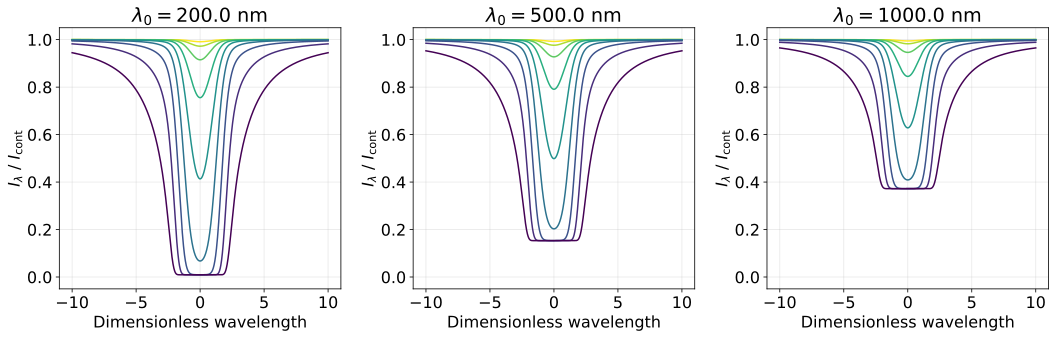

In [6]:
lam0_list = numpy.array([200, 500, 1000]) * units.nm #central wavelengths to plot for

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for j, lam0 in enumerate(lam0_list):
    intensity = compute_profile(tau0, a, u, lam0, T_surface, T_layer)
    intensity /= intensity.max() #scaling by continuity
    for i in range(len(tau0)):
        ax[j].plot(u, intensity[:, i], color=colors[i])
    ax[j].set_title(r"$\lambda_0 = ${}".format(lam0))
    ax[j].set_xlabel("Dimensionless wavelength")
    ax[j].set_ylabel(r"$I_\lambda$ / $I_{\rm cont}$")
    ax[j].set_ylim(-0.05, 1.05) #slightly larger than (0, 1) for visibility
    ax[j].grid(alpha=0.3)
plt.tight_layout()

By plotting the normalised curves with respect to their continuum, we can more easily compare them for different wavelengths. We see that lower wavelengths gives larger relative separation between the continuum and saturation limit, which is what we expected given that they are defined by the Planck function. Remembering back to exercise 1, we found that the temperature had less effect on the intensity for longer wavelengths in the Planck function. This means the separation between intensities for two given temperatures is less for longer wavelengths, which matches what we see here for the normalised line profiles.

### Exercise 3: The curve of growth

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Using the code from Exercise 2, compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.  

* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)
    
</div>

To plot a curve of growth we use the equivalent width $W_\lambda$:

\begin{align*}
    W_\lambda \equiv \int 1 - \frac{I(\lambda)}{I_{\rm cont}}
               {\rm d} \lambda, \tag{13}
\end{align*}

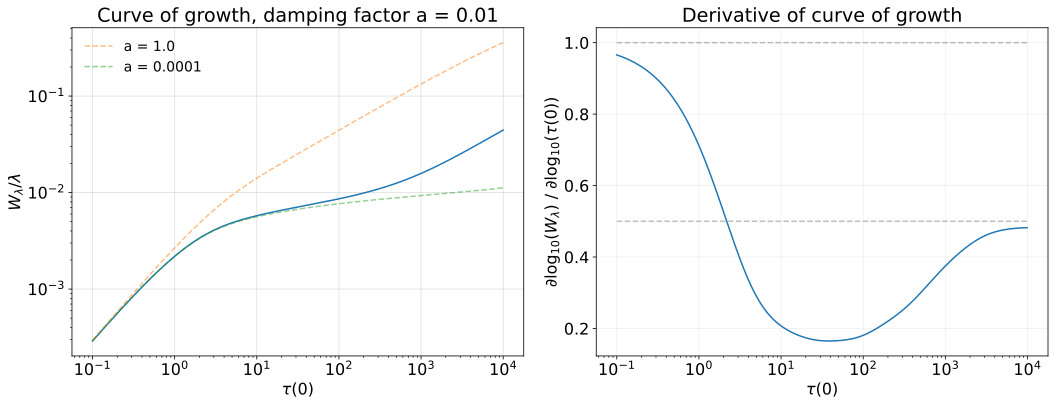

In [7]:
tau0 = numpy.logspace(-1, 4, 1000)  #function of tau -> more points
u = numpy.linspace(-200, 200, 1000) #increased width to include high tau wings
a = 0.01                            #damping factor a=0.01 generates similar plot to Wright (1948)
lam0 = 500 * units.nm

intensity = compute_profile(tau0, a, u, lam0, T_surface, T_layer)
W_lam = numpy.trapz(1 - intensity.value/numpy.nanmax(intensity.value), x=u, axis=0)/lam0.value #max(intensity) ~= continuity

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(tau0, W_lam) #main curve of growth

for ai in [1.0, 0.0001]: #secondary growth curves for comparison, only 2 to avoid cluttering
    intensity_i = compute_profile(tau0, ai, u, lam0, T_surface, T_layer)
    W_lam_i = numpy.trapz(1 - intensity_i.value/numpy.nanmax(intensity_i.value), x=u, axis=0)/lam0.value
    ax[0].plot(tau0, W_lam_i, "--", alpha=0.5, label="a = {}".format(ai))

ax[0].set_title("Curve of growth, damping factor a = {}".format(a))
ax[0].set_xlabel(r"$\tau(0)$")
ax[0].set_ylabel(r"$W_\lambda/\lambda$")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend(prop={"size" : 14})
ax[0].grid(alpha=0.4)

ax[1].plot(tau0[:-1], (numpy.log10(W_lam[1:])-numpy.log10(W_lam[:-1]))/(numpy.log10(tau0[1:])-numpy.log10(tau0[:-1])))
ax[1].plot(tau0, [1.0]*len(tau0), "--k", alpha=0.25) #marking where slope is 1:1
ax[1].plot(tau0, [0.5]*len(tau0), "--k", alpha=0.25) #slope 1:2
ax[1].set_title("Derivative of curve of growth")
ax[1].set_xlabel(r"$\tau(0)$")
ax[1].set_ylabel(r"$\partial \log_{10}(W_\lambda)$ / $\partial \log_{10}(\tau(0))$")
ax[1].set_xscale('log')
ax[1].grid(alpha=0.2)

plt.tight_layout()

The three parts of the growth curve represent the line profile growth and saturation:

   1. Linear growth with increase in $\tau(0)$.
   2. Growth weakens as line core reaches saturation limit.
   3. Increase in growth as wings start to develop.

Eventually the curve would reach a fourth stage at a constant height as the wings reach full saturation. Note that this is just for a limited interval in $u$, as the third stage would continue forever for $u\in (-\infty, \infty)$.

As can be seen in the derivative of this curve, the first and third stage have slopes of $\approx 1:1$ and $\approx 1:2$. This is since the overall curve grows linearly with $\tau(0)$ in stage 1, but the saturated line core leaves the wings which was previously shown to grow with $\sqrt{\tau(0)}$. In a log-log plot, a growth with $x^{0.5}$ corresponds with a slope of $1:2$.

\begin{align*}
    F(x) = x^{0.5} \Rightarrow \log{F(x)} = \log{x^{0.5}} = 0.5 \log{x}
\end{align*}

The onset of the third part and overall shape of the curve is controlled by the damping parameter $a$. The values along the axes are not the same as for the reference plot *Wright (1948)*, meaning adjustment of $a$ are based on shape and comparison of scales. By experimentation a value of $a=0.01$ was found to give a similar shape and a secondary stage width of 2 orders of magnitude, just as seen for *Wright (1948)*, making this a rough estimate for the value for iron lines. Alongside the main curve are two more curves with other values of $a$ for comparison.

To produce emission lines instead of absorption lines, we would have to choose the temperatures such that the layer would add intensity to the surface radiation. Assuming the surface properties to be constant, we change the layer temperature $T_{\rm layer}$ to be larger than the surface temperature $T_{\rm surface}$:

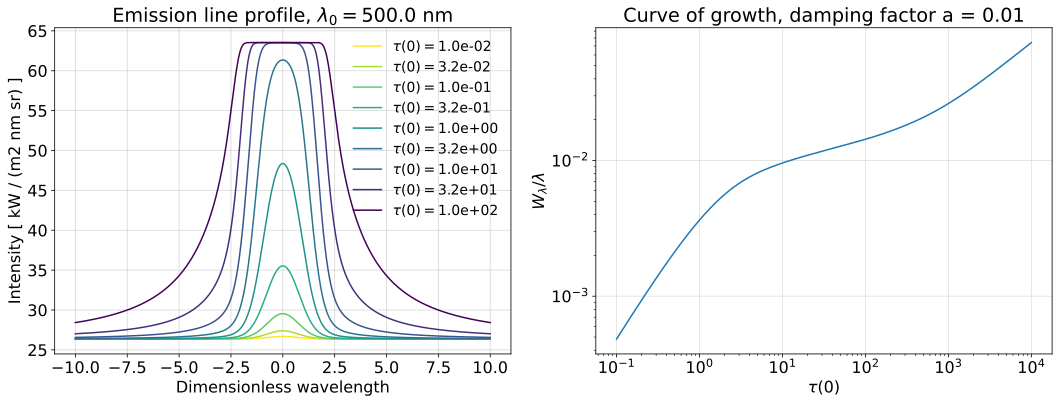

In [8]:
### line profile parameters, same as for absorption lines for consistency
tau0 = numpy.logspace(-2, 2, 9)
lam0 = 500 * units.nm
T_layer = 7000 * units.K #larger layer temperature to get emission line
a = 0.1                  #damping factor
u = numpy.linspace(-10, 10, 2001)
colors = cm.viridis(numpy.linspace(0, 1, len(tau0)))[::-1]

### calculating line profile
intensity = compute_profile(tau0, a, u, lam0, T_surface, T_layer)

### growth curve parameters
tau0_wlam = numpy.logspace(-1, 4, 1000)  #function of tau -> more points
u_wlam = numpy.linspace(-200, 200, 1000) #increased width to include high tau wings
a = 0.01                                 #damping factor a=0.01 generates similar plot to Wright (1948)

### calculating growth curve
intensity_wlam = compute_profile(tau0_wlam, a, u_wlam, lam0, T_surface, T_layer)
W_lam = numpy.trapz(intensity_wlam.value/numpy.nanmin(intensity_wlam.value) - 1, x=u_wlam, axis=0)/lam0.value

### plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for i in range(len(tau0)):
    ax[0].plot(u, intensity[:, i], color=colors[i], label=r"$\tau(0) = ${:.1e}".format(tau0[i]))
ax[0].set_title(r"Emission line profile, $\lambda_0 = ${:.1f}".format(lam0))
ax[0].set_xlabel("Dimensionless wavelength")
ax[0].set_ylabel(r"Intensity [ {} ]".format(intensity.unit))
ax[0].legend(prop={'size': 14})
ax[0].grid(alpha=0.5)
ax[1].plot(tau0_wlam, abs(W_lam)) #exercise asks for absolute, despite no negative values?
ax[1].set_title("Curve of growth, damping factor a = {}".format(a))
ax[1].set_xlabel(r"$\tau(0)$")
ax[1].set_ylabel(r"$W_\lambda/\lambda$")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].grid(alpha=0.4)
plt.tight_layout()

As we can see, the emission line is very similar to the absorption line, but here the intensity gets increased by the layer instead of removed/absorbed. In order to calculate the curve of growth we also had to change the integral for $W_\lambda$, as the curve is an addition to the continuum instead of a subtraction. After scaling by the continuum value, this only results in a change in sign for the expression:

\begin{align*}
    W_\lambda = \int \frac{I(\lambda)}{I_{\rm cont}} - 1 {\rm d} \lambda
\end{align*}

With this, the emission curve of growth becomes equal to the case of absorption.